## Divide TIF

### View TIF

Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_1.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_2.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_3.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_4.tif


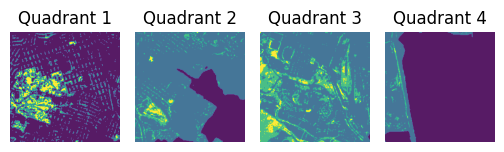

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to the original .tif file
# file_path_0 = "./ChangeDetection/Train/Images/T2019/California_SanFrancisco_N_2019"  
file_path_0 = "./ChangeDetection/Train/Masks/T2019/m_California_Fresno_SW_2019"  

# Loop through the 4 quadrants and display each one
for i in range(1, 5):
    file_path = f'{file_path_0}_{i}.tif'  # Path for the cropped quadrants
    print(f"Loading: {file_path}")

    # Open the cropped .tif file
    image = Image.open(file_path)

    # Convert the image to a NumPy array to access pixel values
    pixel_values = np.array(image)

    # Display the cropped image
    plt.subplot(1, 5, i + 1)
    plt.imshow(pixel_values, cmap="viridis", alpha=0.9)
    plt.title(f"Quadrant {i}")
    plt.axis("off")  # Optional: Hides axes

# Show the plot with all images side by side
plt.tight_layout()
plt.show()


### mega

Divide TIFS

In [ ]:
# Define a function to divide a tif image into 4 equal quadrants
def divide_and_save(image_path, output_dir):
    image = Image.open(image_path)
    width, height = image.size

    # Define the coordinates for the 4 quadrants (256x256, or other depending on image size)
    quadrants = [
        (0, 0, 256, 256),       # Top-left
        (256, 0, 512, 256),     # Top-right
        (0, 256, 256, 512),     # Bottom-left
        (256, 256, 512, 512)    # Bottom-right
    ]

    # Loop through the quadrants and save the image quadrants
    for i, coords in enumerate(quadrants, start=1):
        cropped_img = image.crop(coords)

        # Save the cropped image with a new name (adding suffix _1, _2, etc.)
        new_filename = f"{os.path.splitext(os.path.basename(image_path))[0]}_{i}.tif"
        new_file_path = os.path.join(output_dir, new_filename)
        cropped_img.save(new_file_path)
        print(f"Saved Image: {new_file_path}")

# TO BE CHANGED
directories = [
    {
        'images_dir': './ChangeDetection/Test/Images',
        'masks_dir': './ChangeDetection/Test/Masks'
    },
    {
        'images_dir': './ChangeDetection/Train/Images',
        'masks_dir': './ChangeDetection/Train/Masks'
    },
    {
        'images_dir': './ChangeDetection/Val/Images',
        'masks_dir': './ChangeDetection/Val/Masks'
    }
]

# Process each pair of directories
for dirs in directories:
    images_dir = dirs['images_dir']
    masks_dir = dirs['masks_dir']

    for subfolder in ['T2019', 'T2024']:
        # Process Images in the subfolder
        image_subfolder = os.path.join(images_dir, subfolder)
        for filename in os.listdir(image_subfolder):
            if filename.endswith('.tif'):
                image_path = os.path.join(image_subfolder, filename)
                divide_and_save(image_path, image_subfolder)

        # Process Masks in the subfolder
        mask_subfolder = os.path.join(masks_dir, subfolder)
        for filename in os.listdir(mask_subfolder):
            if filename.endswith('.tif'):
                mask_path = os.path.join(mask_subfolder, filename)
                divide_and_save(mask_path, mask_subfolder)

print("Division of images and masks complete.")

Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_E_2019_1.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_E_2019_2.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_E_2019_3.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_E_2019_4.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_NE_2019_1.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_NE_2019_2.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_NE_2019_3.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Birmingham_NE_2019_4.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Cincinnati_NW_2019_1.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Cincinnati_NW_2019_2.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Cincinnati_NW_2019_3.tif
Saved Image: ./ChangeDetection/Test/Images\T2019\Alabama_Cincinnati_NW_2019_4.tif
Saved Image: ./Chang

Delete 512x512 TIFS

In [ ]:
import os

def delete_files_by_extension(folder_path, file_patterns):
    # Get a list of all files in the directory
    try:
        files = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"The folder path '{folder_path}' does not exist.")
        return
    except PermissionError:
        print(f"Permission denied for the folder path '{folder_path}'.")
        return

    # Iterate through files and delete those matching the patterns
    for file in files:
        if any(file.endswith(pattern) for pattern in file_patterns):
            file_path = os.path.join(folder_path, file)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Failed to delete {file_path}: {e}")

# List of folder paths
folder_paths = [
    r"./ChangeDetection/Test/Images/T2019",
    r"./ChangeDetection/Test/Masks/T2019",
    r"./ChangeDetection/Test/Images/T2024",
    r"./ChangeDetection/Test/Masks/T2024",
    r"./ChangeDetection/Train/Images/T2019",
    r"./ChangeDetection/Train/Masks/T2019",
    r"./ChangeDetection/Train/Images/T2024",
    r"./ChangeDetection/Train/Masks/T2024",
    r"./ChangeDetection/Val/Images/T2019",
    r"./ChangeDetection/Val/Masks/T2019",
    r"./ChangeDetection/Val/Images/T2024",
    r"./ChangeDetection/Val/Masks/T2024"
]

# File patterns to delete
file_patterns = ['_2019.tif', '_2024.tif']

# Loop through all folder paths
for folder_path in folder_paths:
    print(f"Processing folder: {folder_path}")
    delete_files_by_extension(folder_path, file_patterns)



Processing folder: ./ChangeDetection/Test/Images/T2019
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Birmingham_E_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Birmingham_NE_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Cincinnati_NW_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Cincinnati_SE_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Cleveland_W_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Dayton_N_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Huntsville_N_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Huntsville_S_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Toledo_E_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Toledo_NW_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Tuscaloosa_C_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_Tuscaloosa_E_2019.tif
Deleted: ./ChangeDetection/Test/Images/T2019\Alabama_T

### View TIF

Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_1.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_2.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_3.tif
Loading: ./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019_4.tif


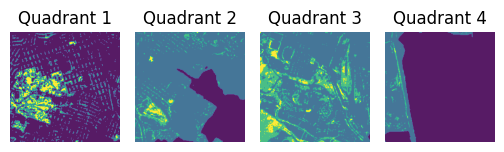

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to the original .tif file
# file_path_0 = "./ChangeDetection/Train/Images/T2019/California_SanFrancisco_N_2019"  
file_path_0 = "./ChangeDetection/Train/Masks/T2019/m_California_SanFrancisco_SE_2019"  

# Loop through the 4 quadrants and display each one
for i in range(1, 5):
    file_path = f'{file_path_0}_{i}.tif'  # Path for the cropped quadrants
    print(f"Loading: {file_path}")

    # Open the cropped .tif file
    image = Image.open(file_path)

    # Convert the image to a NumPy array to access pixel values
    pixel_values = np.array(image)

    # Display the cropped image
    plt.subplot(1, 5, i + 1)
    plt.imshow(pixel_values, cmap="viridis", alpha=0.9)
    plt.title(f"Quadrant {i}")
    plt.axis("off")  # Optional: Hides axes

# Show the plot with all images side by side
plt.tight_layout()
plt.show()
